In [32]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I. Data Wrangling

In [33]:
# Loading dataset

data = pd.read_csv('dataset/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [34]:
# Dimensions of the dataframe refers to the overall data sample,
# i.e, the total number of rows and columns in the data.

data.shape

(96453, 12)

In [35]:
# Data's summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [36]:
# Descriptibe statistical details of the data-frame

data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [37]:
# Distinct elements in the data frame

data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [38]:
# Check of missing values, and incorporating "sum()" to get the total
# number of missing values in each columns

data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

<b> Observation of the above details</b>

1.  In 'Precip Type', there are 517 missing values
2.  'Wind Bearing (degress)' has only integer values.
3.  Formatted Date is in String
4. Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are <b>Zero</b>, and they can be <b>Zero</b>
5. From Statistical details, and Distinct Elements in Dataframe, it is noticed that 'Loud Cover' are <b>Zero</b> or </b>Null</b>.

In [39]:
# Removing unwanted columns which don't add values to the analysis
# Dropping 'Loud Cover' as it has one unique value 0, which won't be useful

data = data.drop(['Loud Cover'], axis = 1)

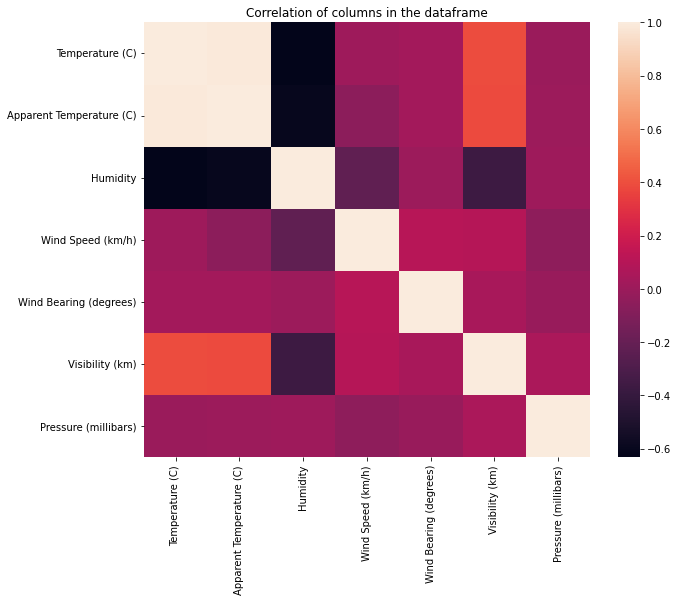

In [40]:
## Columns' Correlation

# Assigning data correlation matrix
relation = data.corr()

# Increasing the size of the heatmap
plt.figure(figsize = (10,8))

sns.heatmap( data = relation)

# Heatmap's title
plt.title("Correlation of columns in the dataframe")

# Saving the figure
plt.savefig('graphs/dataframe-correlations.png', dpi = 300, bbox_inches = 'tight')
plt.show()

<b> Observation </b>

From the Pairwise correlation chart, the <b>Apparent Temperature</b> and the <b>Humidity</b> have a high degree of correlation with each other, which makes the project's hypothesis is more likely to be valid.

Only 3 columns needed for checking, and validating the task which is
data['Formatted Date','Apparent Temperature(c)', 'Humidity']. 
The other columns are of less significance.

<b>Parsing Dates, Creating new dataframe</b>

In [41]:
# Changing the 'Formatted Date' from String to Datetime

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc = True)

# Setting the DataFrame index (row labels) using one or more existing columns
# which is "Formatted Date"

data = data.set_index("Formatted Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


<b> Resampling Data</b>

It is a convenient method for frequency conversion. The object must have a datetime like an index.

Since "hourly data" exists, resampling it will be to monthly.
All what is needed is "Apparent Temperature" and "Humidity" columns
to test the hypothesis.

In [42]:
df_column = ['Apparent Temperature (C)', 'Humidity']

df_monthly_mean = data[df_column].resample("MS").mean()
# MS-Month Starting

df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


<b> Checkpoint: End of Data Wrangling ( Cleaning & Resampling )</b>

## II. Analysis

<b>Relation between Apparent Temperature & Humidity Using Regression</b>

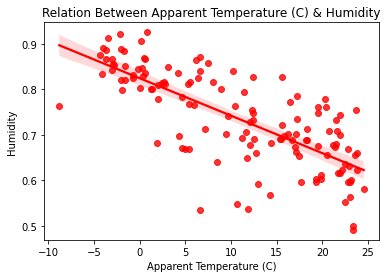

In [44]:
sns.regplot (data = df_monthly_mean, x = "Apparent Temperature (C)", y = "Humidity", color = "r")

# Plot's title
plt.title("Relation Between Apparent Temperature (C) & Humidity")

# Saving figure
plt.savefig('graphs/Relation Between Apparent Temperature (C) & Humidity.png', dpi = 300, bbox_inches = 'tight')
plt.show()


<b>Observation</b>

There is a Linear Relation between "Apparent Temperature" and "Humidity" with a <b>negative slope</b>

As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperature drop, relative humidity increases.

<b> Yearly Variation of Apparent Temperature and Humidity </b>

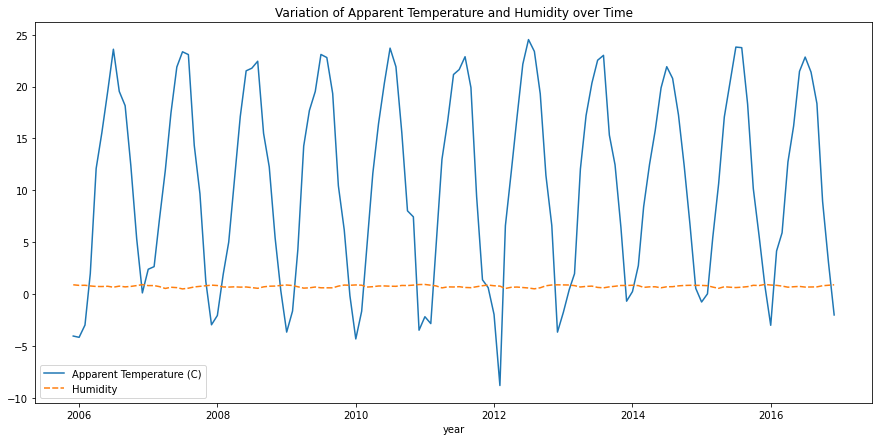

In [45]:
# Variation of Apparent Temperature and Humidity over time

plt.figure( figsize = (15,7))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('year')
plt.title('Variation of Apparent Temperature and Humidity over Time')
plt.savefig('graphs/Variation of Apparent Temperature and Humidity over Time.png', dpi = 300, bbox_inches = 'tight')
plt.show()

<b> Observation </b>

The above graph displays average temperature and humidity for all 12 months over the year 10 i.e. , from 2006 - 2016.

1. "Humidity" remained constant in the 10 year interval.
2. "Apparent Temperature" changed at regular intervals with constant amplitude during the 10 ears.

<b> Variation of Humidity & Apparent Temperature for every month</b>

The following function will help to analyze the variations in the Apparent Temperature and Humidity for every month over 10 years interval, while labeling each month number with its appropriate <b>Month Name</b>, and a <b>Specified color</b> for graph's sake of clarity. 

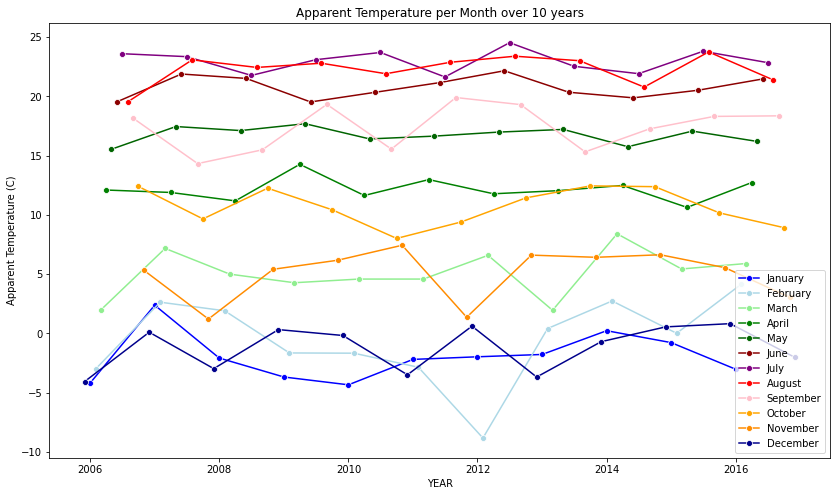

In [52]:
# Labelling month's function.

def label_color(month):
    if month == 1:
        return 'January', 'blue'
    elif month == 2:
        return 'February', 'lightblue'
    elif month == 3:
        return 'March', 'lightgreen'
    elif month == 4:
        return 'April', 'green'
    elif month == 5:
        return 'May', 'darkgreen'
    elif month == 6:
        return 'June', 'darkred'
    elif month == 7:
        return 'July', 'purple'
    elif month == 8:
        return 'August', 'red'
    elif month == 9:
        return 'September', 'pink'
    elif month == 10:
        return 'October', 'orange'
    elif month == 11:
        return 'November', 'darkorange'
    elif month == 12:
        return 'December', 'darkblue'

# Assigning variables to resampled data
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]

def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data = mdata, label = label, color = color, marker = 'o')

def sns_plot(title, data):
    plt.figure(figsize = (14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i, data)
    plt.savefig('graphs/'+ title +'.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

# "Apparent Temperature" per Month over 10 years
title = 'Apparent Temperature per Month over 10 years'
sns_plot(title, TEMP_DATA)

<b> Observation </b>

The graph above displays the changes in Temperature for each month during the 10 year interval

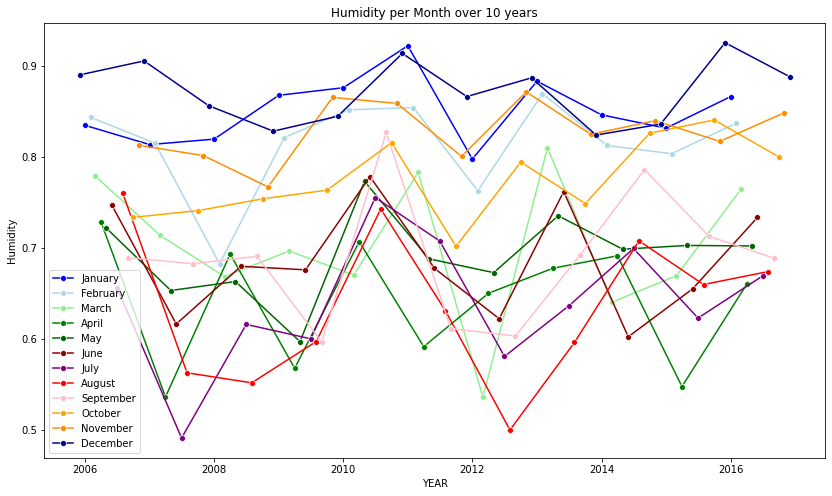

In [53]:
# "Humidity" per Month over 10 years
title = 'Humidity per Month over 10 years'
sns_plot(title, HUM_DATA)


<b> Observation </b>

The graph above displays the changes in Humidity for each month during the 10 year interval

<b> Variation of Humidity & Apparent Temperature for each month</b>

The following function will help analyze the variations in 
<b>Apparent Temperature</b>, and <b>Humidity</b> for every month during the 10 years period.

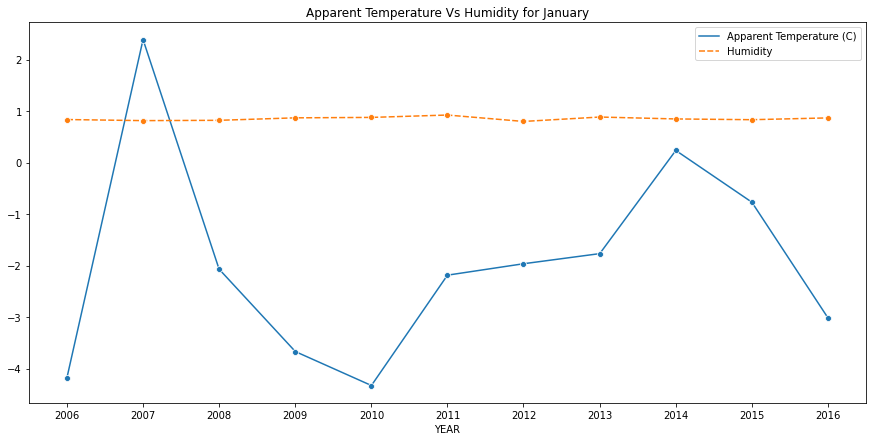

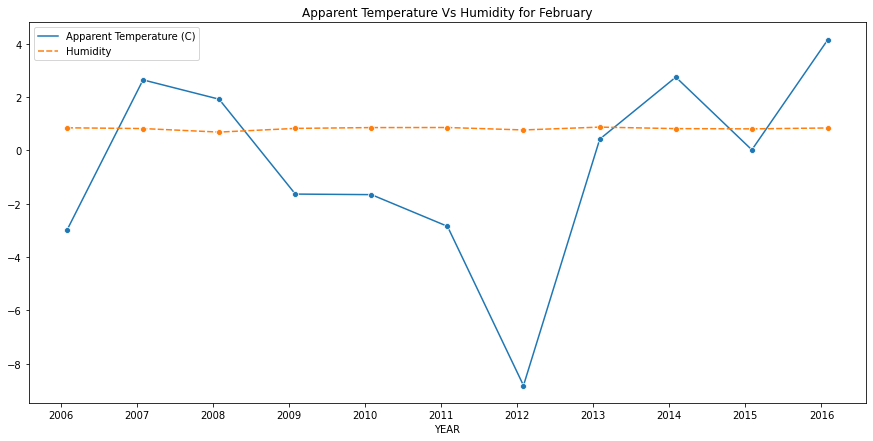

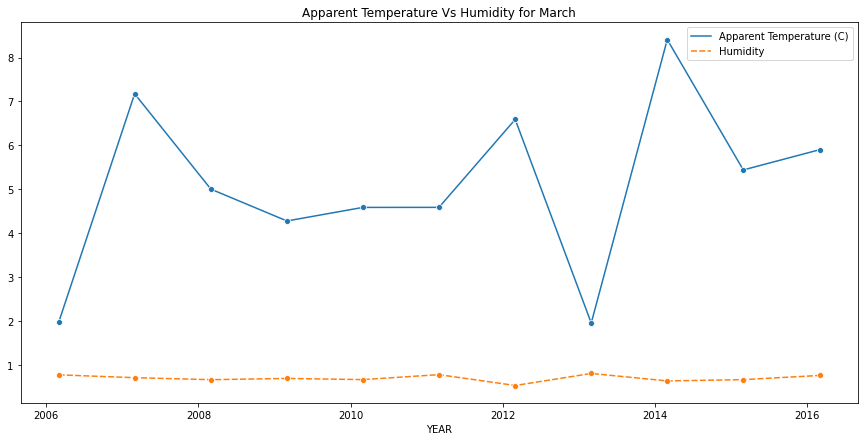

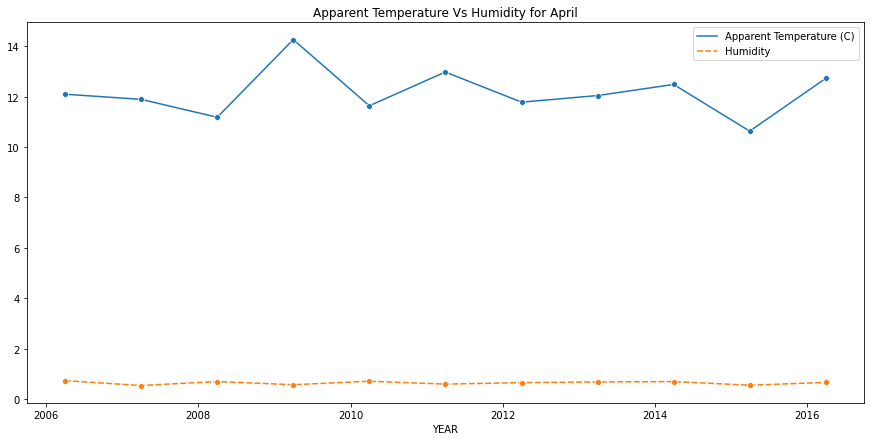

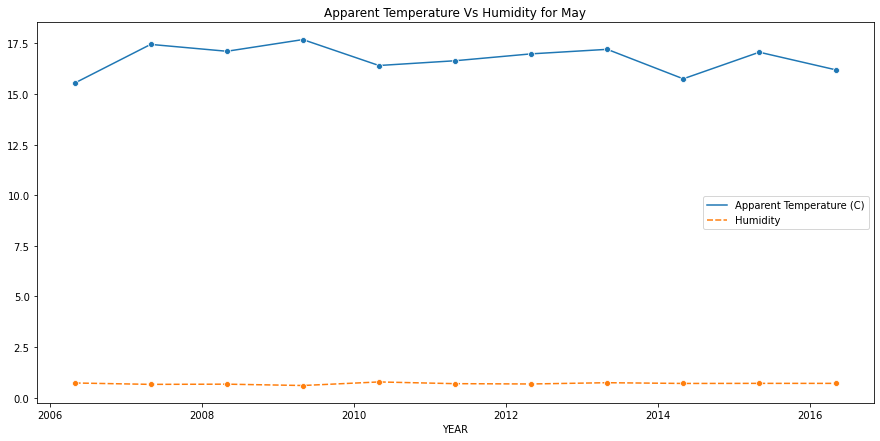

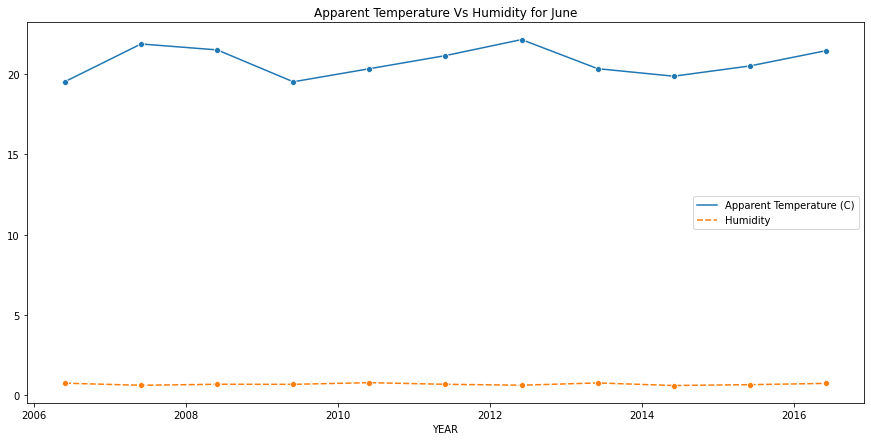

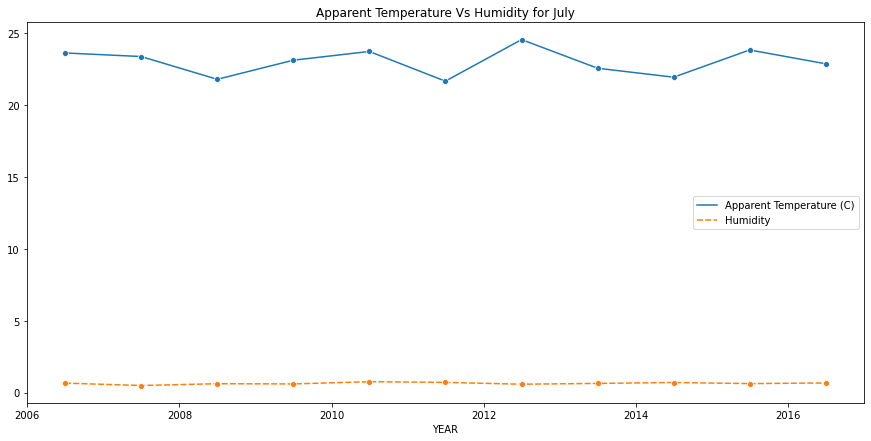

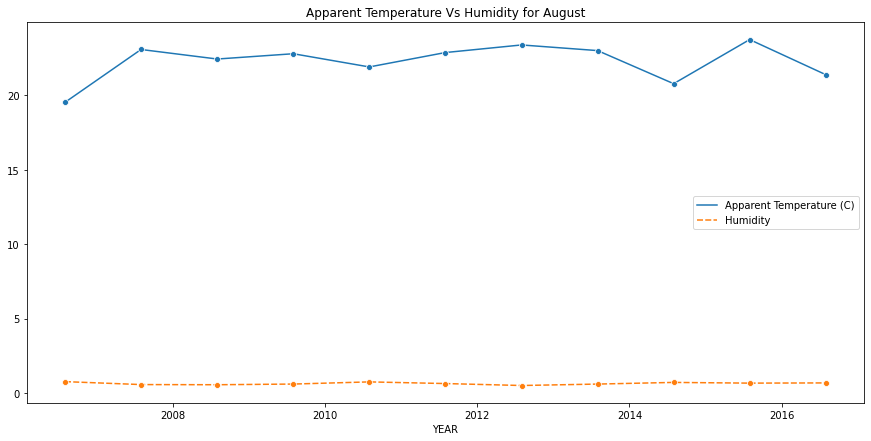

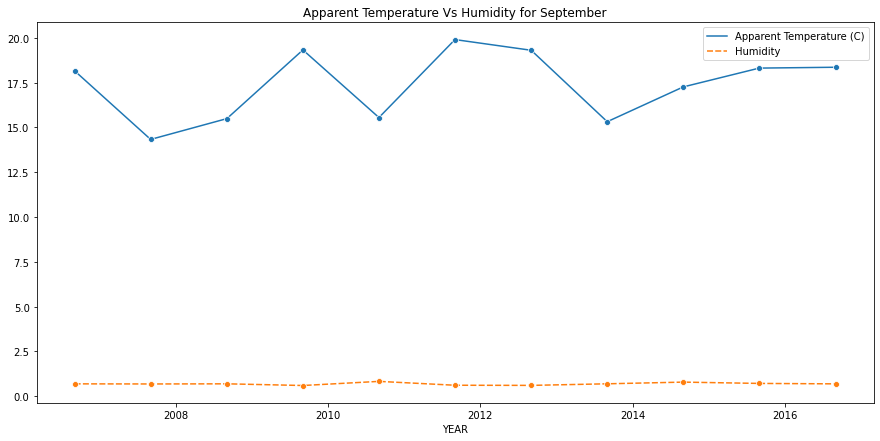

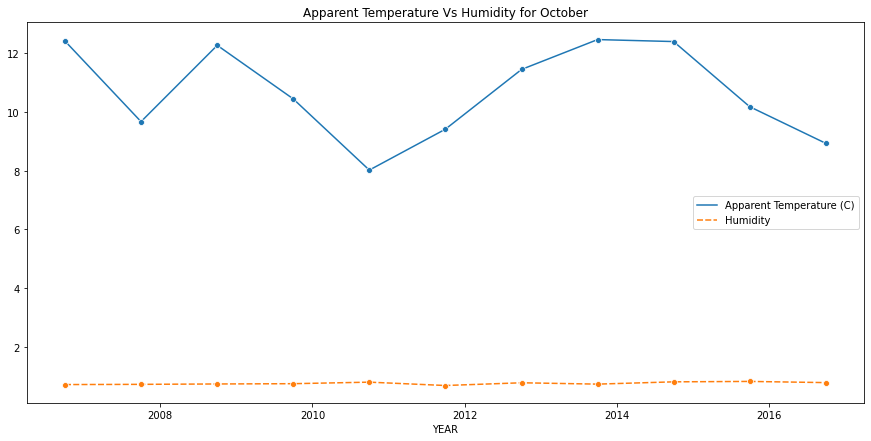

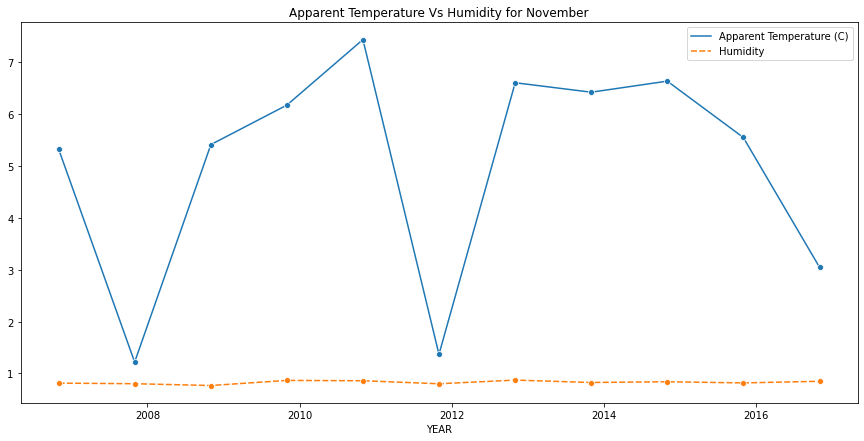

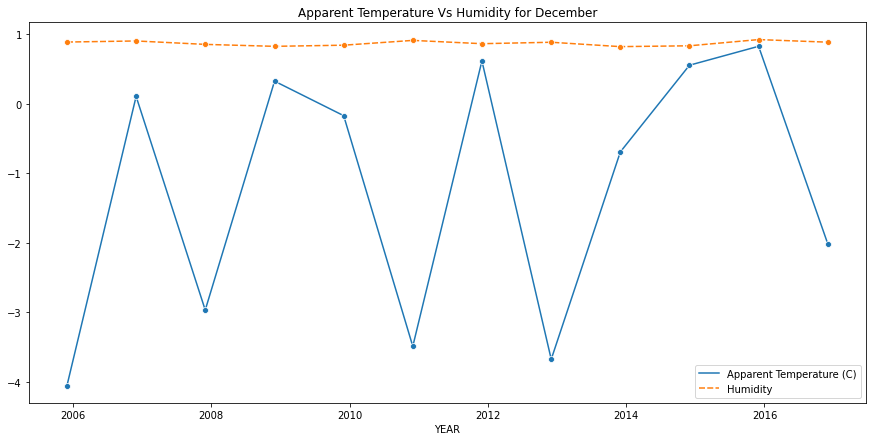

In [54]:
# Function to plot variations for each month
def sns_month_plot(month):
    plt.figure(figsize = (15,7))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    plt.xlabel('YEAR')
    sns.lineplot(data = data, marker = 'o')
    name = "graphs/month" + str(month) + ".png"
    plt.savefig(name, dpi = 300, bbox_inches = 'tight')
    plt.show()

# Plot for every month
for month in range(1,13):
    sns_month_plot(month)

<b>Observation</b>

The graphs above shows the variations in "Apparent Temperature" and "Humidity" for each month over 10 year duration.

1. Based on the plots above, "The Apparent Temperature" has a tremendous fluctuation over the time period.

2. There is a sharp rise of temperature between year 2008-2009 which decreases later on between 2009-2010

3. It is observed that the average "Apparent Temperature" is at its peak in year 2099 which further drops to its lowest in year 2015.

4. Whereas the average Humidity has remained nearly constant of over the 10 year period.

<b> Conclusion </b>

From this analysis, it is concluded that the <b>Apparent Temperature</b>, and <b>humidity</b> compared monthly across 10 years of the data indicates that there is indeed an increase due to Global warming. This clears that the <b>Null Hypothesis is having a True positive impact.</b>
